<a href="https://colab.research.google.com/github/Lord-Kanzler/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment_ALEX_KAISER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# TODO - your code!
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import t, ttest_1samp
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
#Loading Data and cleaning

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

df = pd.read_csv('house-votes-84.data', names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'], na_values="?")

df.head()


--2020-02-18 21:40:18--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.5’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2020-02-18 21:40:18 (629 KB/s) - ‘house-votes-84.data.5’ saved [18171/18171]



,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [70]:
df.dtypes

party                   object
handicapped-infants     object
water-project           object
budget                  object
physician-fee-freeze    object
el-salvador-aid         object
religious-groups        object
anti-satellite-ban      object
aid-to-contras          object
mx-missile              object
immigration             object
synfuels                object
education               object
right-to-sue            object
crime                   object
duty-free               object
south-africa            object
dtype: object

In [71]:
df.describe()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,435,423,387,424,424,420,424,421,420,413,428,414,404,410,418,407,331
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


In [51]:
df.describe(exclude='number')

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,435,423,387,424,424,420,424,421,420,413,428,414,404,410,418,407,331
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


In [72]:
# replacing y = 1, n = 0
df = df.replace({"y": 1, "n": 0})
dem.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [73]:
dem = df[df['party']=='democrat']
rep = df[df['party']=='republican']
dem.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [74]:
dem['budget'].value_counts()

1.0    231
0.0     29
Name: budget, dtype: int64

In [75]:
# checking for NaN
dem['budget'].isnull().sum()

7

In [77]:
dem_no_nan['budget'] = dem['budget'].dropna()
dem_no_nan['budget'].isnull().sum()

0

In [0]:
# retyping function from lecture
def confidence_interval(sample, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  sample = np.array(sample)
  mean = np.mean(sample)
  n = len(sample)
  stderr = np.std(sample, ddof=1) / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t * stderr
  return mean - margin_of_error, mean, mean + margin_of_error

In [79]:
# determining Confidence Interval
lower_bound, mean, upper_bound = confidence_interval(dem_no_nan['budget'])
print("lower bound:", lower_bound)
print("mean", mean)
print("upper bound:", upper_bound)

lower bound: 0.8499435153340716
mean 0.8884615384615384
upper bound: 0.9269795615890052


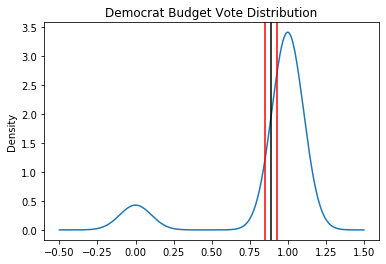

In [80]:
#plotting CI
CI = confidence_interval(dem_no_nan['budget'])

dem_no_nan['budget'].plot.density()
plt.title("Democrat Budget Vote Distribution")
plt.axvline(x=CI[0], color='red')
plt.axvline(x=CI[1], color='black')
plt.axvline(x=CI[2], color='red');
plt.show()

**Conclusion**

I am 95% certain that the sample mean of the Democrate Budget Votes (mean = 0.889) will be within the confidence interval from lower bound: 0.8499435153340716 and upper bound: 0.9269795615890052.

Given that the mean i 0.889, I would also conclude that the majority of votes from the democrates appear to be in favour of the budget bill.


CI definition: A 95% level of confidence means that 95% of the confidence intervals calculated from these random samples will contain the true population mean.

**As such my interpretation of the CI is consistant with it's definition**

**Chi-squared tests**

In [0]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import t, ttest_1samp
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
#Loading Data and cleaning

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

df = pd.read_csv('house-votes-84.data', names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'], na_values="?")

df.head()


--2020-02-18 22:01:03--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.6’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2020-02-18 22:01:03 (625 KB/s) - ‘house-votes-84.data.6’ saved [18171/18171]



,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [84]:
df.describe()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,435,423,387,424,424,420,424,421,420,413,428,414,404,410,418,407,331
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


In [85]:
df.describe(exclude='number')

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,435,423,387,424,424,420,424,421,420,413,428,414,404,410,418,407,331
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


Null Hypothesis: party and budget vote outcome are indipendant.

Alternative Hypothesis: party and budget vote outcome are dependent.

Confidence Level: 95%

In [87]:
# running chi2 on "party and budget" by hand
df['party'].value_counts()

democrat      267
republican    168
Name: party, dtype: int64

In [88]:
df['budget'].value_counts()

y    253
n    171
Name: budget, dtype: int64

In [90]:
#calculating expected values
contingency_table = pd.crosstab(df['party'], df['budget'], margins=True)
contingency_table

budget,n,y,All
party,,,
democrat,29,231,260
republican,142,22,164
All,171,253,424


In [92]:
row_sums = contingency_table.iloc[0:2, 2].values
col_sums = contingency_table.iloc[2, 0:2].values

print(row_sums)
print(col_sums)

[260 164]
[171 253]


In [0]:
total_total = df.shape[0]

In [95]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total_total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)  
print(expected)

(2, 2)
[[102.20689655 151.2183908 ]
 [ 64.46896552  95.38390805]]


In [96]:
# crosstab without margins
observed = pd.crosstab(df['party'], df['budget']).values
print(observed.shape)
observed

(2, 2)


array([[ 29, 231],
       [142,  22]])

In [97]:
# Chi-Squared
chi_squared = ((observed - expected)**2/(expected)).sum() 
print(f"Chi-Squared: {chi_squared}")

Chi-Squared: 244.22519160090147


In [100]:
# running chi2 on "party and budget" using stats
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 234.65408769323486
P-value: 5.759792112623893e-53
Degrees of Freedom: 1
Expected: 
 [[104.85849057 155.14150943]
 [ 66.14150943  97.85849057]]


**Conclusion:**

Based on a chi^2 statistic of ~234.66 and a p-value of $5.759792112623893e-53$, I reject the null hypothesis that my party and budget vote outcomes are indipendant. 

There seems to be party specific cast of votes.

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

**Summary of finding**


The calculated mean and CI for democratic vote outcomes on the budget bill was:

lower bound: 0.8499435153340716

mean 0.8884615384615384

upper bound: 0.9269795615890052


The vote destribution can be observed in the figure below.

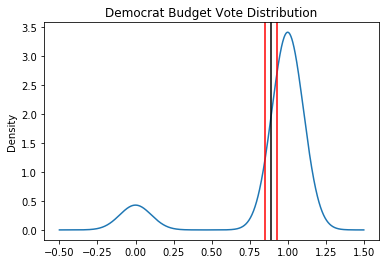

Performing a chi-2 test for indipendance, in order to assess if budget votes were cast along party lines or if there was a "party specific preference" yielded the vollowing result:

Chi-Squared: 234.65408769323486

P-value: 5.759792112623893e-53

Degrees of Freedom: 1

Expected: 

 [[104.85849057 155.14150943]

 [ 66.14150943  97.85849057]]



Hypothesis:

Null Hypothesis: party and budget vote outcome are indipendant.

Alternative Hypothesis: party and budget vote outcome are dependent.

Confidence Level: 95%



**Conclusion:**

Based on a chi^2 statistic of ~234.66 and a p-value of $5.759792112623893e-53$, I reject the null hypothesis that the party and budget vote outcomes are indipendant. 

There seems to be party specific cast of votes.

**Implications**


Yes there seems to be a party specific trend of votes on the budget bill. But is it surprising?

Historical outcomes suggest not. Republicans historically advocated in favour of small governments and low budgets, while democrats traditionally advocated in favour of increased social and health services. 

**Applying techiques to data**

In [101]:
# using tuna data set from yesterdays stretch goal

df = pd.read_csv('https://raw.githubusercontent.com/Lord-Kanzler/DS-Unit-1-Sprint-2-Statistics/master/module1/Tuna.csv')
df.head(50)

,Tuna,Mercury
0,albacore,0.0000
1,albacore,0.4100
2,albacore,0.8200
3,albacore,0.3200
4,albacore,0.0360
5,albacore,0.2800
6,albacore,0.2900
7,albacore,0.3400
8,albacore,0.3600
9,albacore,0.4200


In [105]:
# converting "mercury" to categorical
label_names = ['0-9', '10-19', '20-29', '30-39', '40-49', '50+']
df['Mercury_categories'] = pd.cut(df['Mercury'], 4)

df.head()

,Tuna,Mercury,Mercury_categories
0,albacore,0.000,"(-0.00148, 0.37]"
1,albacore,0.410,"(0.37, 0.739]"
2,albacore,0.820,"(0.739, 1.109]"
3,albacore,0.320,"(-0.00148, 0.37]"
4,albacore,0.036,"(-0.00148, 0.37]"


In [106]:
albacore = df[df['Tuna']=='albacore ']

albacore.head(10)

,Tuna,Mercury,Mercury_categories
0,albacore,0.000,"(-0.00148, 0.37]"
1,albacore,0.410,"(0.37, 0.739]"
2,albacore,0.820,"(0.739, 1.109]"
3,albacore,0.320,"(-0.00148, 0.37]"
4,albacore,0.036,"(-0.00148, 0.37]"
5,albacore,0.280,"(-0.00148, 0.37]"
6,albacore,0.290,"(-0.00148, 0.37]"
7,albacore,0.340,"(-0.00148, 0.37]"
8,albacore,0.360,"(-0.00148, 0.37]"
9,albacore,0.420,"(0.37, 0.739]"


In [107]:
#Cleaning data
yellowfin = df[df['Tuna']=='yellowfin']

yellowfin.head(10)

,Tuna,Mercury,Mercury_categories
43,yellowfin,0.00,"(-0.00148, 0.37]"
44,yellowfin,0.00,"(-0.00148, 0.37]"
45,yellowfin,0.06,"(-0.00148, 0.37]"
46,yellowfin,0.09,"(-0.00148, 0.37]"
47,yellowfin,0.17,"(-0.00148, 0.37]"
48,yellowfin,0.21,"(-0.00148, 0.37]"
49,yellowfin,0.21,"(-0.00148, 0.37]"
50,yellowfin,0.22,"(-0.00148, 0.37]"
51,yellowfin,0.23,"(-0.00148, 0.37]"
52,yellowfin,0.24,"(-0.00148, 0.37]"


In [0]:
# function from lecture
def confidence_interval(sample, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  sample = np.array(sample)
  mean = np.mean(sample)
  n = len(sample)
  stderr = np.std(sample, ddof=1) / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t * stderr
  return mean - margin_of_error, mean, mean + margin_of_error

In [109]:
# determining Confidence Interval for albacore['Mercury']
lower_bound, mean, upper_bound = confidence_interval(albacore['Mercury'])
print("lower bound:", lower_bound)
print("mean", mean)
print("upper bound:", upper_bound)

lower bound: 0.3151596084747521
mean 0.35762558139534883
upper bound: 0.40009155431594556


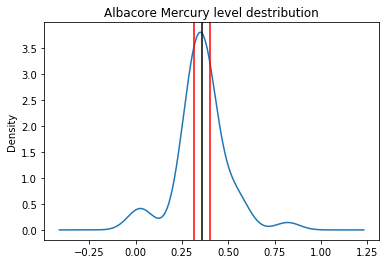

In [110]:
#plotting CI for albacore['Mercury']

CI = confidence_interval(albacore['Mercury'])

albacore['Mercury'].plot.density()
plt.title("Albacore Mercury level destribution")
plt.axvline(x=CI[0], color='red')
plt.axvline(x=CI[1], color='black')
plt.axvline(x=CI[2], color='red');
plt.show()

In [112]:
# determining Confidence Interval for yellowfin['Mercury']
lower_bound, mean, upper_bound = confidence_interval(yellowfin['Mercury'])
print("lower bound:", lower_bound)
print("mean", mean)
print("upper bound:", upper_bound)

lower bound: 0.3244938132674734
mean 0.3544398051948052
upper bound: 0.38438579712213705


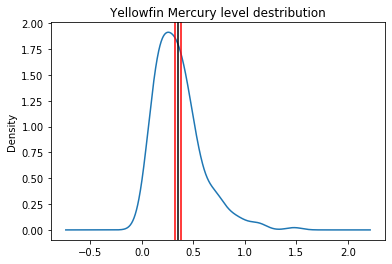

In [122]:
#plotting CI for yellowfin['Mercury']

CI = confidence_interval(yellowfin['Mercury'])

yellowfin['Mercury'].plot.density()
plt.title("Yellowfin Mercury level destribution")
plt.axvline(x=CI[0], color='red')
plt.axvline(x=CI[1], color='black')
plt.axvline(x=CI[2], color='red');
plt.show()

In [114]:
df.describe(exclude='number')

,Tuna,Mercury_categories
count,274,274
unique,2,4
top,yellowfin,"(-0.00148, 0.37]"
freq,231,160


In [115]:
#Chi-2 test of indipendance for 'Tuna' and 'Mercury_categories'
contingency_table = pd.crosstab(df['Tuna'], df['Mercury_categories'], margins=True)

contingency_table

Mercury_categories,"(-0.00148, 0.37]","(0.37, 0.739]","(0.739, 1.109]","(1.109, 1.478]",All
Tuna,,,,,
albacore,22,20,1,0,43
yellowfin,138,78,12,3,231
All,160,98,13,3,274



Hypothesis:

Null Hypothesis: Tuna kind and mercury levels are indipendant.

Alternative Hypothesis: Tuna kind and mercury levels are dependent.

Confidence Level: 95%

In [116]:
# expected values
row_sums = contingency_table.iloc[0:2, 4].values
col_sums = contingency_table.iloc[2, 0:4].values

print(row_sums)
print(col_sums)

[ 43 231]
[160  98  13   3]


In [0]:
total_total = df.shape[0]

In [118]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total_total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)  
print(expected)

(2, 4)
[[ 25.10948905  15.37956204   2.04014599   0.47080292]
 [134.89051095  82.62043796  10.95985401   2.52919708]]


In [119]:
# Get a crosstab without the margins:

observed = pd.crosstab(df['Tuna'], df['Mercury_categories']).values
print(observed.shape)
observed

(2, 4)


array([[ 22,  20,   1,   0],
       [138,  78,  12,   3]])

In [120]:
# calculating chi-2
# Array broadcasting will work with numpy arrays but not python lists
chi_squared = ((observed - expected)**2/(expected)).sum() 
print(f"Chi-Squared: {chi_squared}")

Chi-Squared: 3.2907107605256627


In [121]:
# alternatively using stats
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 3.2907107605256627
P-value: 0.3489376279554397
Degrees of Freedom: 3
Expected: 
 [[ 25.10948905  15.37956204   2.04014599   0.47080292]
 [134.89051095  82.62043796  10.95985401   2.52919708]]


**Conclusion:**

Based on a chi^2 statistic of 3.2907107605256627 and a p-value of $0.3489376279554397$, I fail to reject the null hypothesis that the kinds of tuna and mercury levels outcomes are indipendant. 

There seems to be no difference in mercury levels among the kinds of tuna.



## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)